In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [6]:
# Load the dataset
df = pd.read_csv('data/obecity_prediction.csv')

# Initial data exploration
df.shape

(2111, 17)

In [7]:
df.dtypes

Gender             object
Age               float64
Height            float64
Weight            float64
family_history     object
FAVC               object
FCVC              float64
NCP               float64
CAEC               object
SMOKE              object
CH2O              float64
SCC                object
FAF               float64
TUE               float64
CALC               object
MTRANS             object
Obesity            object
dtype: object

In [8]:
df.isnull().sum()

Gender            0
Age               0
Height            0
Weight            0
family_history    0
FAVC              0
FCVC              0
NCP               0
CAEC              0
SMOKE             0
CH2O              0
SCC               0
FAF               0
TUE               0
CALC              0
MTRANS            0
Obesity           0
dtype: int64

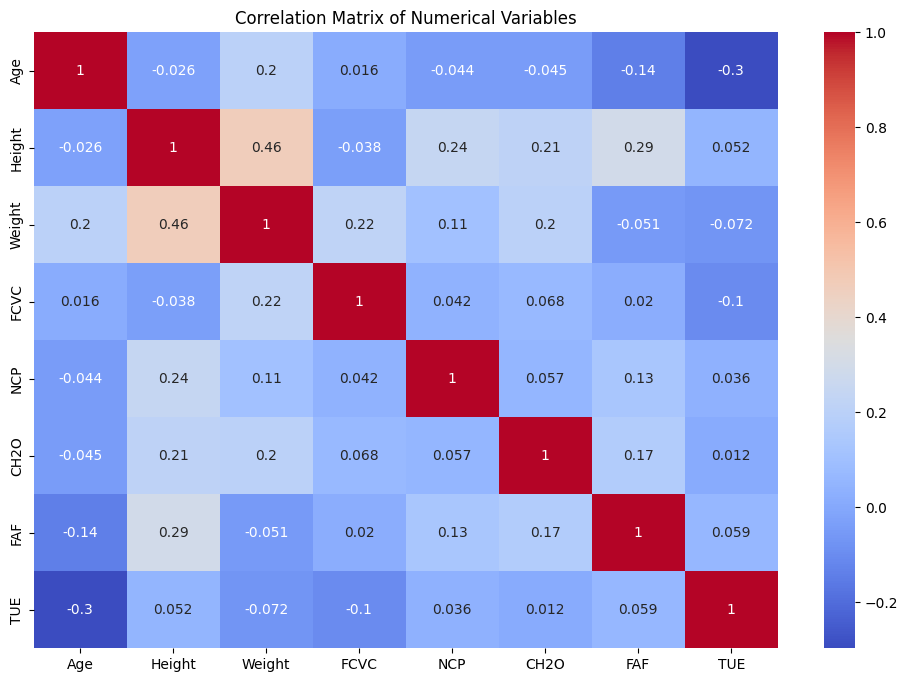

In [9]:
# Encode categorical variables
le = LabelEncoder()
categorical_columns = ['Gender', 'family_history', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'Obesity']
for column in categorical_columns:
    df[column + '_encoded'] = le.fit_transform(df[column])

# Create correlation matrix for numerical variables
numerical_columns = df.select_dtypes(include=['float64']).columns
correlation_matrix = df[numerical_columns].corr()

# Visualize correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

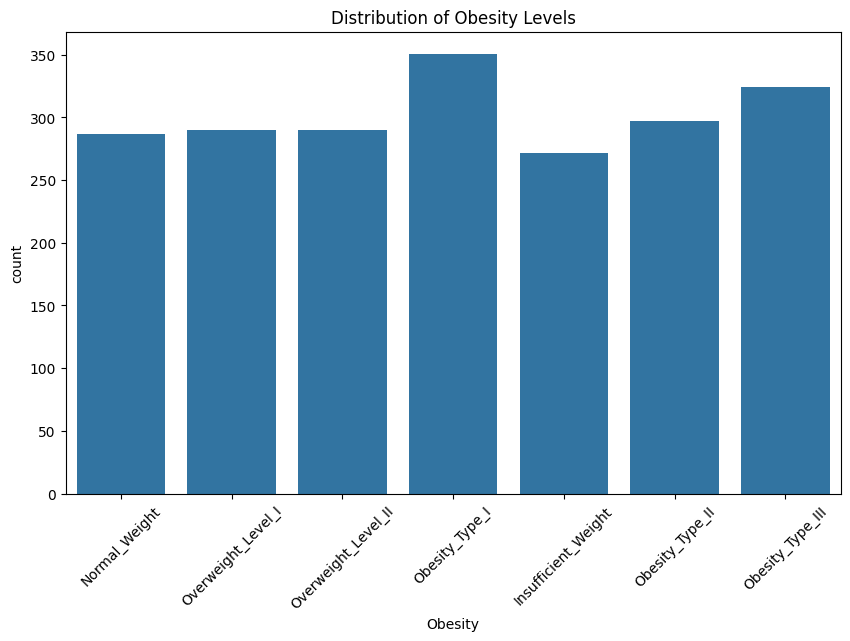

In [10]:
# Distribution of obesity levels
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Obesity')
plt.xticks(rotation=45)
plt.title('Distribution of Obesity Levels')
plt.show()

In [11]:
# Prepare features and target
X = df.drop(['Obesity', 'Obesity_encoded'] + [col for col in df.columns if not col.endswith('_encoded')], axis=1)
y = df['Obesity_encoded']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = rf_model.predict(X_test_scaled)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.79      0.69        56
           1       0.71      0.47      0.56        62
           2       0.57      0.56      0.57        78
           3       0.41      0.72      0.53        58
           4       0.82      1.00      0.90        63
           5       0.69      0.32      0.44        56
           6       0.61      0.34      0.44        50

    accuracy                           0.61       423
   macro avg       0.63      0.60      0.59       423
weighted avg       0.63      0.61      0.59       423

